# Projet 5 Openclassrooms parcours Data Scientist : Segmentez des clients d'un site e-commerce
## Etudiante : Regaud Agnès
## Note importante : les fichiers source se trouvent dans le dossier DATA/Source et le fichier cleané est dans DATA/Cleaned.

## Sujet : Vous êtes consultant pour Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne. Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.
## Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.
## Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

## 1er notebook : analyse exploratoire

In [1]:
package_list = ['pandas', 'numpy', 'matplotlib', 'scikit-learn']

In [2]:
!python3 -V

Python 3.9.13


In [3]:
txt = !python3 -m pip freeze
check = lambda i : any([(pack in i) for pack in package_list])
txt = [i for i in txt if check (i)]
txt

['matplotlib @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_757ijfo2tl/croots/recipe/matplotlib-suite_1660167932741/work',
 'matplotlib-inline @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_9ddl71oqte/croots/recipe/matplotlib-inline_1662014471815/work',
 'numpy @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_10c245a1-1c81-453c-8b70-3e944787a8d9mo1xhesu/croots/recipe/numpy_and_numpy_base_1653915529188/work',
 'numpydoc @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_753dae38-7ca3-4e28-bd02-7f92dc5dac540wd4kft3/croots/recipe/numpydoc_1657529877062/work',
 'pandas==1.4.4',
 'scikit-learn @ file:///opt/concourse/worker/volumes/live/cffa5efe-beec-4a37-5774-350794e43990/volume/scikit-learn_1642617139916/work',
 'scikit-learn-intelex==2021.20221004.121333']

# 1. Imports

In [4]:
#builtin
import os

#data
import pandas as pd
import numpy as np


#visualisation
import matplotlib.pyplot as plt
import seaborn as sns




# 2. Data

In [5]:
os.listdir()

['Regaud_Agnès_1_notebook_exploration_072023.ipynb',
 'Regaud_Agnès_3_notebook_ simulation_072023.ipynb',
 'Regaud_Agnès_2_notebook_essais_072023.ipynb',
 '.ipynb_checkpoints',
 'DATA']

In [6]:
os.listdir("data/source/")

['olist_sellers_dataset.csv',
 'product_category_name_translation.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv']

In [7]:
path = "./data/source/"
filename_customers = "olist_customers_dataset.csv"
filename_orders = "olist_orders_dataset.csv"
filename_order_payments = "olist_order_payments_dataset.csv"
filename_products = "olist_products_dataset.csv"
filename_product_category = "product_category_name_translation.csv"
filename_order_items = "olist_order_items_dataset.csv"
filename_order_reviews = 'olist_order_reviews_dataset.csv'

In [8]:
df_customers = pd.read_csv(path + filename_customers)
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
df_orders = pd.read_csv(path + filename_orders)
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
df_order_payments = pd.read_csv(path + filename_order_payments)
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
df_products = pd.read_csv(path + filename_products)
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
df_product_category = pd.read_csv(path + filename_product_category)
df_product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [13]:
df_order_items = pd.read_csv(path + filename_order_items)
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
df_order_reviews = pd.read_csv(path + filename_order_reviews)
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


# 3. First Tour

## 3.1 Display

In [15]:
#Caractéristiques des différents dataset :
tableau_carac = pd.DataFrame()
tableau_carac['Fichiers'] = ['Clients', 'Produits', 'Commandes', 'Paiements', 'Traduction des catégories de produits', 'Informations sur les commandes', 'Avis clients']
tableau_carac['Nombre de lignes'] = [df_customers.shape[0], df_products.shape[0], df_orders.shape[0], df_order_payments.shape[0], df_product_category.shape[0], df_order_items.shape[0], df_order_reviews.shape[0]]
tableau_carac['Nombre de colonnes'] = [df_customers.shape[1], df_products.shape[1], df_orders.shape[1], df_order_payments.shape[1], df_product_category.shape[1], df_order_items.shape[1], df_order_reviews.shape[1]]
tableau_carac['Valeurs manquantes'] = [df_customers.isnull().sum().sum(), df_products.isnull().sum().sum(), df_orders.isnull().sum().sum(), df_order_payments.isnull().sum().sum(), df_product_category.isnull().sum().sum(), df_order_items.isnull().sum().sum(), df_order_reviews.isnull().sum().sum()]
tableau_carac




,Fichiers,Nombre de lignes,Nombre de colonnes,Valeurs manquantes
0,Clients,99441,5,0
1,Produits,32951,9,2448
2,Commandes,99441,8,4908
3,Paiements,103886,5,0
4,Traduction des catégories de produits,71,2,0
5,Informations sur les commandes,112650,7,0
6,Avis clients,99224,7,145903


In [16]:
#Nombre de clients pour une commande = nombre de commandes, mais plus de paiements que 
#de commandes car chaque paiement de commande a été détaillé. Vérifions si toutes les 
#commandes ont un paiement :

list_orders = df_orders.order_id.to_list()
list_payments = df_order_payments.order_id.unique()
print('Nombre de commandes : ', len(list_orders))
print('Nombre de paiements : ', len(list(list_payments)))

#Affichage de la commande qui n'a pas de paiement :
list_orders ==list(list_payments)
diff = set(list_orders) - set(list(list_payments))
print(diff)

Nombre de commandes :  99441
Nombre de paiements :  99440
{'bfbd0f9bdef84302105ad712db648a6c'}


In [17]:
#Commande sans paiement :
df_orders[df_orders['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00


In [18]:
#Recherche de la commande sans paiement dans les paiements :
df_order_payments[df_order_payments['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c']

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [19]:
#Recherche du client dont le paiement de commande n'apparait pas :
df_customers[df_customers['customer_id'] == '86dc2ffce2dfff336de2f386a786e574']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
21125,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP


In [20]:
#Recherche des informations sur la commande dont le paiement n'apparait pas :
df_order_items[df_order_items['order_id']== 'bfbd0f9bdef84302105ad712db648a6c']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
84389,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
84390,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
84391,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83


In [21]:
#Recherche de l'avis laissé par le client :
df_order_reviews[df_order_reviews['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
37547,6916ca4502d6d3bfd39818759d55d536,bfbd0f9bdef84302105ad712db648a6c,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28


## Le client indique que la commande n'est pas arrivée.

In [22]:
#Choix de supprimer cette commande sans paiement (et le client) qui n'est jamais arrivée à destination :
df_orders = df_orders.drop(df_orders.loc[df_orders['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c'].index)
df_order_payments = df_order_payments.drop(df_order_payments.loc[df_order_payments['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c'].index)
df_customers = df_customers.drop(df_customers.loc[df_customers['customer_id'] == '86dc2ffce2dfff336de2f386a786e574'].index)
df_order_items = df_order_items.drop(df_order_items.loc[df_order_items['order_id']== 'bfbd0f9bdef84302105ad712db648a6c'].index)
df_order_reviews = df_order_reviews.drop(df_order_reviews.loc[df_order_reviews['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c'].index)

## 3.2 Structure

## 3.2.1 Customers

In [23]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99440 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99440 non-null  object
 1   customer_unique_id        99440 non-null  object
 2   customer_zip_code_prefix  99440 non-null  int64 
 3   customer_city             99440 non-null  object
 4   customer_state            99440 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.6+ MB


In [24]:
df_customers.nunique()

customer_id                 99440
customer_unique_id          96095
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [25]:
df_customers.duplicated().sum()

0

## 3.2.2 Orders

In [26]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99440 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99440 non-null  object
 1   customer_id                    99440 non-null  object
 2   order_status                   99440 non-null  object
 3   order_purchase_timestamp       99440 non-null  object
 4   order_approved_at              99280 non-null  object
 5   order_delivered_carrier_date   97657 non-null  object
 6   order_delivered_customer_date  96475 non-null  object
 7   order_estimated_delivery_date  99440 non-null  object
dtypes: object(8)
memory usage: 6.8+ MB


In [27]:
df_orders.nunique()

order_id                         99440
customer_id                      99440
order_status                         8
order_purchase_timestamp         98874
order_approved_at                90732
order_delivered_carrier_date     81017
order_delivered_customer_date    95663
order_estimated_delivery_date      458
dtype: int64

In [28]:
df_orders.duplicated().sum()

0

## Remarque : un numéro de commande correspond à un numéro de client et il y a aussi un numéro de client unique. 

In [29]:
#Valeurs manquantes :
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

## 3.2.3 Order payment

In [30]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [31]:
df_order_payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [32]:
df_order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [33]:
#Regardons les commandes dont le paiement est de 0 euro :
df_order_payments[df_order_payments['payment_value'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [34]:
#Regardons la 1ère commande dont un paiement est de 0 euro :
df_order_payments[df_order_payments['order_id'] == '8bcbe01d44d147f901cd3192671144db']
#Il y a plusieurs paiements différents

,order_id,payment_sequential,payment_type,payment_installments,payment_value
5163,8bcbe01d44d147f901cd3192671144db,3,voucher,1,6.25
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00
20963,8bcbe01d44d147f901cd3192671144db,1,credit_card,1,36.21
63762,8bcbe01d44d147f901cd3192671144db,2,voucher,1,31.70


In [35]:
#Total du paiement de cette commande :
df_order_payments.loc[df_order_payments['order_id'] == '8bcbe01d44d147f901cd3192671144db', 'payment_value'].sum()

74.16

In [36]:
#Regardons les détails de cette commande :
df_order_items[df_order_items['order_id'] == '8bcbe01d44d147f901cd3192671144db']
#Un seul produit acheté

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
61321,8bcbe01d44d147f901cd3192671144db,1,85d4c1a46f08f730de651ea6f6645313,3d871de0142ce09b7081e2b9d1733cb1,2018-01-30 23:37:20,59.0,15.16


In [37]:
#Prix total indiqué pour cette commande :
df_order_items.loc[df_order_items['order_id'] == '8bcbe01d44d147f901cd3192671144db', ['price', 'freight_value']].sum().sum()

74.16

In [38]:
#Regardons la 2ème commande dont au moins un paiement est de 0 euro :
df_order_payments[df_order_payments['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352']
#Il y a 29 articles dans cette commande


,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
32519,fa65dad1b0e818e3ccc5cb0e39231352,11,voucher,1,4.03


In [39]:
#Total du paiement de cette commande :
df_order_payments.loc[df_order_payments['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352', 'payment_value'].sum()

457.99

In [40]:
#Regardons les détails de cette commande :
df_order_items[df_order_items['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352']
#Un seul produit acheté

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
110202,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44


In [41]:
#Prix total indiqué pour cette commande :
df_order_items.loc[df_order_items['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352', ['price', 'freight_value']].sum().sum()

457.99

In [42]:
#Détails de paiement de la commande max :
df_order_payments[df_order_payments['payment_value'] == 13664.08]
#Un seul paiement

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08


In [43]:
#Détails de cette commande :
df_order_items[df_order_items['order_id'] == '03caa2c082116e1d31e67e9ae3700499']
#8 produits identiques achetés


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1647,03caa2c082116e1d31e67e9ae3700499,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1648,03caa2c082116e1d31e67e9ae3700499,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1649,03caa2c082116e1d31e67e9ae3700499,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1650,03caa2c082116e1d31e67e9ae3700499,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1651,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1652,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01


In [44]:
df_order_items.loc[df_order_items['order_id'] == '03caa2c082116e1d31e67e9ae3700499', ['price', 'freight_value']].sum().sum()

13664.08

In [45]:
df_order_payments[df_order_payments.duplicated() == True]
#Pas de commande payée en double

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [46]:
#Commandes avec plusieurs paiements :
df_order_payments[df_order_payments['payment_sequential'] != 1]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
25,5cfd514482e22bc992e7693f0e3e8df7,2,voucher,1,45.17
75,3689194c14ad4e2e7361ebd1df0e77b0,2,voucher,1,57.53
102,21b8b46679ea6482cbf911d960490048,2,voucher,1,43.12
121,ea9184ad433a404df1d72fa0a8764232,4,voucher,1,22.49
139,82ffe097d8ddbf319a523b9bbe7725d5,2,voucher,1,30.00
...,...,...,...,...,...
103569,fedcd9f7ccdc8cba3a18defedd1a5547,6,voucher,1,8.60
103732,f0a5b7c94819c69d12a1c0458ec74756,2,voucher,1,80.40
103747,cf101c3abd3c061ca9f78c1bbb1125af,3,voucher,1,8.46
103750,d0bff47153ef056bb4f884a2ec2f0691,2,voucher,1,41.89


In [47]:
#Exemple de commande avec plusieurs paiements :
df_order_payments[df_order_payments['order_id'] == '5cfd514482e22bc992e7693f0e3e8df7']
#Ici paiement par carte en 4 fois et un paiement par bon (voucher)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
25,5cfd514482e22bc992e7693f0e3e8df7,2,voucher,1,45.17
57742,5cfd514482e22bc992e7693f0e3e8df7,1,credit_card,4,665.41


In [48]:
#Autre exemple de commande payée en plusieurs parties :
df_order_payments[df_order_payments['order_id'] == '31bc09fdbd701a7a4f9b55b5955b8687']
#Ici commande avec 7 paiements en une fois tous payés par bons :

,order_id,payment_sequential,payment_type,payment_installments,payment_value
27995,31bc09fdbd701a7a4f9b55b5955b8687,3,voucher,1,37.88
39416,31bc09fdbd701a7a4f9b55b5955b8687,7,voucher,1,3.48
43160,31bc09fdbd701a7a4f9b55b5955b8687,4,voucher,1,40.33
45492,31bc09fdbd701a7a4f9b55b5955b8687,1,voucher,1,26.86
74317,31bc09fdbd701a7a4f9b55b5955b8687,5,voucher,1,22.28
82459,31bc09fdbd701a7a4f9b55b5955b8687,2,voucher,1,55.71
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99


In [49]:
#Paiement de cette commande :
df_order_payments.loc[df_order_payments['order_id'] == '31bc09fdbd701a7a4f9b55b5955b8687', 'payment_value'].sum()

264.53

In [50]:
#Même commande avec prix du produit et frais de port à part :
df_order_items[df_order_items['order_id'] == '31bc09fdbd701a7a4f9b55b5955b8687']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
21777,31bc09fdbd701a7a4f9b55b5955b8687,1,e5ff2945f13a69162a72acc5170ba684,a3e9a2c700480d9bb01fba070ba80a0e,2017-10-19 01:14:32,166.0,98.53


In [51]:
#Vérification que la somme du prix du produit et des frais de port donne la valeur du paiement :
df_order_items.loc[df_order_items['order_id'] == '31bc09fdbd701a7a4f9b55b5955b8687', ['price', 'freight_value']].sum().sum()
#C'est bien égal

264.53

## 3.2.4 Products

In [52]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [53]:
df_products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [54]:
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

## On remarque qu'il manque 610 catégories de produits

In [55]:
df_products[df_products['product_category_name'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [56]:
df_products.duplicated().sum()

0

## 3.2.5 Product category name translation

In [57]:
df_product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [58]:
df_product_category.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

## 3.2.6 Order items

In [59]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112647 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112647 non-null  object 
 1   order_item_id        112647 non-null  int64  
 2   product_id           112647 non-null  object 
 3   seller_id            112647 non-null  object 
 4   shipping_limit_date  112647 non-null  object 
 5   price                112647 non-null  float64
 6   freight_value        112647 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.9+ MB


In [60]:
df_order_items.nunique()

order_id               98665
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93317
price                   5968
freight_value           6999
dtype: int64

In [61]:
df_order_items[df_order_items['order_id'] == '03caa2c082116e1d31e67e9ae3700499']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1647,03caa2c082116e1d31e67e9ae3700499,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1648,03caa2c082116e1d31e67e9ae3700499,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1649,03caa2c082116e1d31e67e9ae3700499,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1650,03caa2c082116e1d31e67e9ae3700499,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1651,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1652,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01


# Remarque importante : une même commande est répétée ici plusieurs fois pour indiquer les articles commandés (ici identiques) et les frais de port sont répartis sur chaque article à l'unité, 'price' est le prix de l'article

In [62]:
df_order_items.duplicated().sum()
#Pas de commande en double

0

## Comme on indique le nombre d'articles dans la commande de manière séquentielle, il n'y a pas de ligne en double

## 3.2.7 Reviews

In [63]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99223 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99223 non-null  object
 1   order_id                 99223 non-null  object
 2   review_score             99223 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40976 non-null  object
 5   review_creation_date     99223 non-null  object
 6   review_answer_timestamp  99223 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.1+ MB


In [64]:
df_order_reviews.nunique()

review_id                  98409
order_id                   98672
review_score                   5
review_comment_title        4527
review_comment_message     36158
review_creation_date         635
review_answer_timestamp    98247
dtype: int64

In [65]:
df_order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87655
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [66]:
#Observation des avis multiples pour une même commande :
df_order_reviews[df_order_reviews['order_id'].duplicated() == True]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08
...,...,...,...,...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,NaN,NaN,2018-02-17 00:00:00,2018-02-19 19:29:19
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,NaN,NaN,2017-05-24 00:00:00,2017-05-24 23:15:21


In [67]:
#Exemple d'avis multiple :
df_order_reviews[df_order_reviews['order_id'] == 'e1bc1083cd7acd30d0576335373b907d']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
4465,6a6b09101cc2614a5d398230256420bc,e1bc1083cd7acd30d0576335373b907d,4,NaN,Falta receber um jogo de cama de solteiro. Com...,2018-03-23 00:00:00,2018-03-23 23:04:41
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06


In [68]:
#Choix de ne garder que le dernier avis posté par commande :
df_order_reviews = df_order_reviews.sort_values('review_answer_timestamp', ascending=False).drop_duplicates(['order_id'])
df_order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
80582,13548d0f62b03a0d3cb6efc00877fa13,30a2f24dd6770c91faa6b3481319204b,5,NaN,NaN,2018-08-14 00:00:00,2018-10-29 12:27:35
49615,728d5cfdc7283cfd0a8061d7581a19f8,7e8072dc0f35ebb0c1b2a4743e0f179a,5,NaN,NaN,2018-07-12 00:00:00,2018-10-26 21:36:41
92802,6c883909cf53725a13caf477a70f00a4,7ce4e38f4eadd993bb5b2e60bb7f7bec,5,Muito bonita,"Amei a mesinha, que pena que me confundir na c...",2018-08-16 00:00:00,2018-10-24 21:34:38
14687,abf08328d2f1f0e8a33eee9f52f502f6,99e4a1f9377bf28f08f54a2eecccbf0d,5,NaN,NaN,2018-02-02 00:00:00,2018-10-24 18:26:25
46904,6c50d16eb583d5db7e841b77e89b7045,0b223d92c27432930dfe407c6aea3041,5,NaN,NaN,2018-08-31 00:00:00,2018-10-24 16:27:36
...,...,...,...,...,...,...,...
88097,b5f4bca1dd2976aeb590dfe5d52c06f7,18dad78c0f87f4c45ef196daeaa3ffbb,5,NaN,Tudo dentro do combinado,2016-10-18 00:00:00,2016-10-18 18:07:44
41042,b2d5d8db2a841d27a72e4c06c6212368,9aa3197e4887919fde0307fc23601d7a,4,NaN,Só chegou uma parte do pedido ate agora..,2016-10-15 00:00:00,2016-10-17 21:02:49
28075,53752edb26544dd41c1209f582c9c589,b8b9d7046c083150cb5360b83a8ebb51,5,NaN,O pedido foi entregue antes do prazo pr0metido,2016-10-16 01:00:00,2016-10-16 15:45:11
60439,743d98b1a4782f0646898fc915ef002a,e2144124f98f3bf46939bc5183104041,4,NaN,NaN,2016-10-15 00:00:00,2016-10-16 03:20:17


In [69]:
#Vérification :
df_order_reviews[df_order_reviews['order_id'] == 'e1bc1083cd7acd30d0576335373b907d']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06


In [70]:
df_order_reviews[df_order_reviews['review_score'].isnull() == True]
#Pas d'avis vide

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


## 3.2.8 Différence entre les fichiers order_items et order_payments

In [71]:
df_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [72]:
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [73]:
df_order_payments['order_id'].nunique()

99440

In [74]:
df_order_items['order_id'].nunique()

98665

In [75]:
df_order_payments[~df_order_payments['order_id'].isin(df_order_items['order_id'].to_list())]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
68,947e9c6bfd83a06953c420ef92d3da6e,1,voucher,1,69.46
235,f86d7bc39aab05299691322044b63bb2,1,voucher,1,1302.42
259,90eaac01afdf4e531a70ad869e092c75,1,credit_card,1,234.43
720,fe87d4b944748f63ca5ed22cc55b6fb6,1,debit_card,1,173.68
1014,4a42846a6eed9d15714fe30181399f2a,1,credit_card,1,34.37
...,...,...,...,...,...
103718,fc20b8e282da6f3fbcdd3a3cedecb723,1,credit_card,10,3782.19
103728,92fca7ed7b7df4695007bd7f227e3333,1,credit_card,1,52.57
103766,b17fd4c033b06e8d888de8ea6105ef9d,1,credit_card,5,103.10
103807,974f9f87a3bad01b2ac72fe987505e9b,1,credit_card,3,91.18


# Remarque : quelques commandes (830) sont dans order_payment mais pas dans order_items

In [76]:
df_order_items[~df_order_items['order_id'].isin(df_order_payments['order_id'].to_list())]
#Ici pas de commande dans order_item qui ne serait pas dans order_payment

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


# 4. Etude des catégories de produits

## 1) Exploration

In [77]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [78]:
#Nombre de catégories de produits dans le DF produits :
df_products['product_category_name'].nunique()

73

In [79]:
df_products['product_category_name'].isna().sum()

610

In [80]:
#Liste des catégorie de produits dans le fichier produits
df_products['product_category_name'].unique().tolist()


['perfumaria',
 'artes',
 'esporte_lazer',
 'bebes',
 'utilidades_domesticas',
 'instrumentos_musicais',
 'cool_stuff',
 'moveis_decoracao',
 'eletrodomesticos',
 'brinquedos',
 'cama_mesa_banho',
 'construcao_ferramentas_seguranca',
 'informatica_acessorios',
 'beleza_saude',
 'malas_acessorios',
 'ferramentas_jardim',
 'moveis_escritorio',
 'automotivo',
 'eletronicos',
 'fashion_calcados',
 'telefonia',
 'papelaria',
 'fashion_bolsas_e_acessorios',
 'pcs',
 'casa_construcao',
 'relogios_presentes',
 'construcao_ferramentas_construcao',
 'pet_shop',
 'eletroportateis',
 'agro_industria_e_comercio',
 nan,
 'moveis_sala',
 'sinalizacao_e_seguranca',
 'climatizacao',
 'consoles_games',
 'livros_interesse_geral',
 'construcao_ferramentas_ferramentas',
 'fashion_underwear_e_moda_praia',
 'fashion_roupa_masculina',
 'moveis_cozinha_area_de_servico_jantar_e_jardim',
 'industria_comercio_e_negocios',
 'telefonia_fixa',
 'construcao_ferramentas_iluminacao',
 'livros_tecnicos',
 'eletrodomesti

In [81]:
#Remplacement de la catégorie "Nan" en portugais par "Inconnue" dans le fichier produit
df_products['product_category_name'].fillna("Inconnue", inplace = True)
df_products['product_category_name'].nunique()

74

In [82]:
df_products['product_category_name'].isna().sum()

0

In [83]:
df_product_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [84]:
df_product_category['product_category_name'].isna().sum()

0

In [85]:
list_categories_traduites = list(df_product_category['product_category_name'])
list_categories_traduites

['beleza_saude',
 'informatica_acessorios',
 'automotivo',
 'cama_mesa_banho',
 'moveis_decoracao',
 'esporte_lazer',
 'perfumaria',
 'utilidades_domesticas',
 'telefonia',
 'relogios_presentes',
 'alimentos_bebidas',
 'bebes',
 'papelaria',
 'tablets_impressao_imagem',
 'brinquedos',
 'telefonia_fixa',
 'ferramentas_jardim',
 'fashion_bolsas_e_acessorios',
 'eletroportateis',
 'consoles_games',
 'audio',
 'fashion_calcados',
 'cool_stuff',
 'malas_acessorios',
 'climatizacao',
 'construcao_ferramentas_construcao',
 'moveis_cozinha_area_de_servico_jantar_e_jardim',
 'construcao_ferramentas_jardim',
 'fashion_roupa_masculina',
 'pet_shop',
 'moveis_escritorio',
 'market_place',
 'eletronicos',
 'eletrodomesticos',
 'artigos_de_festas',
 'casa_conforto',
 'construcao_ferramentas_ferramentas',
 'agro_industria_e_comercio',
 'moveis_colchao_e_estofado',
 'livros_tecnicos',
 'casa_construcao',
 'instrumentos_musicais',
 'moveis_sala',
 'construcao_ferramentas_iluminacao',
 'industria_comerc

In [86]:
df_products.loc[~df_products['product_category_name'].isin(list_categories_traduites), 'product_category_name'].unique()
#Trois catégories dans le fichier produits qui ne sont pas dans le fichier de traduction

array(['Inconnue', 'pc_gamer',
       'portateis_cozinha_e_preparadores_de_alimentos'], dtype=object)

In [87]:
#Ajout de traduction :
df_cat_sup = pd.DataFrame({'product_category_name': ['Inconnue','pc_gamer','portateis_cozinha_e_preparadores_de_alimentos'],
                          'product_category_name_english' : ['Inconnue','pc_gamer','kitchen_and_food_prep_racks']},
                          index=[0, 1, 2])

df_product_category = pd.concat([df_product_category, df_cat_sup],ignore_index = True)
df_product_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,Inconnue,Inconnue
72,pc_gamer,pc_gamer


In [88]:
#Vérification des Catégories non traduites en anglais :
list_categories_réelles = list(df_products['product_category_name'].unique())
list_categories_traduites = list(df_product_category['product_category_name'])

print(len(list_categories_réelles))
print(len(list_categories_traduites))
list_diff = set(list_categories_réelles) - set(list_categories_traduites)
print(list_diff)

74
74
set()


## 2) Analyse des commandes par catégorie de produits

In [89]:
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [90]:
df_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [91]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [92]:
df_product_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,Inconnue,Inconnue
72,pc_gamer,pc_gamer


In [93]:
#Tableau d'analyse des catégories de produits commandés :
df_analyse_categ = df_order_items[['order_id', 'order_item_id', 'product_id']]
df_analyse_categ = pd.merge(df_analyse_categ, df_products[['product_id', 'product_category_name']], on = 'product_id', how='outer')
df_analyse_categ = pd.merge(df_analyse_categ, df_product_category, on = 'product_category_name', how='outer')


df_analyse_categ



,order_id,order_item_id,product_id,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
...,...,...,...,...,...
112642,b99217b1fcf2fdeace7b8d869b76cb91,1,57bdf3098169cccdb62221bd3e089cbd,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
112643,bc3ac768a8963f4ca68942ea6558fc9f,1,57bdf3098169cccdb62221bd3e089cbd,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
112644,cab08f0417a702d0f4782ec02356a4ac,1,8cfc3506cedc0626364457d254429118,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
112645,cb53f0b6e8f9082a9f5a113765dd1236,1,8cfc3506cedc0626364457d254429118,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [94]:
df_analyse_categ.isna().sum()
#pas d' articles commandés sans catégorie associée (dont catégorie 'inconnue')

order_id                         0
order_item_id                    0
product_id                       0
product_category_name            0
product_category_name_english    0
dtype: int64

In [95]:
df_analyse_categ['product_category_name_english'].nunique()
#74 catégories de produits vendus (dont catégorie 'inconnue')

74

In [96]:
analyse_categ = pd.DataFrame(df_analyse_categ['product_category_name_english'].value_counts()).reset_index()
analyse_categ = analyse_categ.rename(columns={ 'index': 'Catégorie de produit', 'product_category_name_english' : 'Nombre de produits' })
analyse_categ

,Catégorie de produit,Nombre de produits
0,bed_bath_table,11115
1,health_beauty,9667
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
...,...,...
69,cds_dvds_musicals,14
70,la_cuisine,14
71,pc_gamer,9
72,fashion_childrens_clothes,8


In [97]:
#Vérification :
analyse_categ['Nombre de produits'].sum()
#On obtient bien 112647 : le nombre d'articles vendus

112647

In [98]:
#Pourcentages :
analyse_categ['Nombre de produits'] = round(analyse_categ['Nombre de produits']/ analyse_categ['Nombre de produits'].sum()*100,2)
analyse_categ = analyse_categ.rename(columns={ 'Nombre de produits': "Pourcentage parmi l'ensemble des produits" })
analyse_categ.head(10)

,Catégorie de produit,Pourcentage parmi l'ensemble des produits
0,bed_bath_table,9.87
1,health_beauty,8.58
2,sports_leisure,7.67
3,furniture_decor,7.40
4,computers_accessories,6.95
5,housewares,6.18
6,watches_gifts,5.32
7,telephony,4.03
8,garden_tools,3.86
9,auto,3.76


In [99]:
#Vérification :
analyse_categ["Pourcentage parmi l'ensemble des produits"].sum()
#Pas 100% à cause de l'arrondi

99.99

In [100]:
analyse_categ[analyse_categ['Catégorie de produit'] == 'Inconnue']
#1,42% de produits sans catégorie dans toutes les commandes

,Catégorie de produit,Pourcentage parmi l'ensemble des produits
19,Inconnue,1.42


In [101]:
somme_pourc_categ_autre = analyse_categ.loc[analyse_categ["Pourcentage parmi l'ensemble des produits"]<4, "Pourcentage parmi l'ensemble des produits"].sum()
analyse_categ = analyse_categ.drop(analyse_categ.loc[analyse_categ["Pourcentage parmi l'ensemble des produits"]<4].index, axis = 0)
print("Pourcentage de catégories de produits représentant chacune moins de 4% : ", somme_pourc_categ_autre, "%")


df_sup_analyse_categ = pd.DataFrame()
df_sup_analyse_categ['Catégorie de produit'] = ["Autres catégories représentant moins de 4% chacune"]
df_sup_analyse_categ["Pourcentage parmi l'ensemble des produits"] = [somme_pourc_categ_autre]
analyse_categ = pd.concat([analyse_categ, df_sup_analyse_categ],  ignore_index=True)

analyse_categ

Pourcentage de catégories de produits représentant chacune moins de 4% :  43.99 %


,Catégorie de produit,Pourcentage parmi l'ensemble des produits
0,bed_bath_table,9.87
1,health_beauty,8.58
2,sports_leisure,7.67
3,furniture_decor,7.40
4,computers_accessories,6.95
5,housewares,6.18
6,watches_gifts,5.32
7,telephony,4.03
8,Autres catégories représentant moins de 4% cha...,43.99


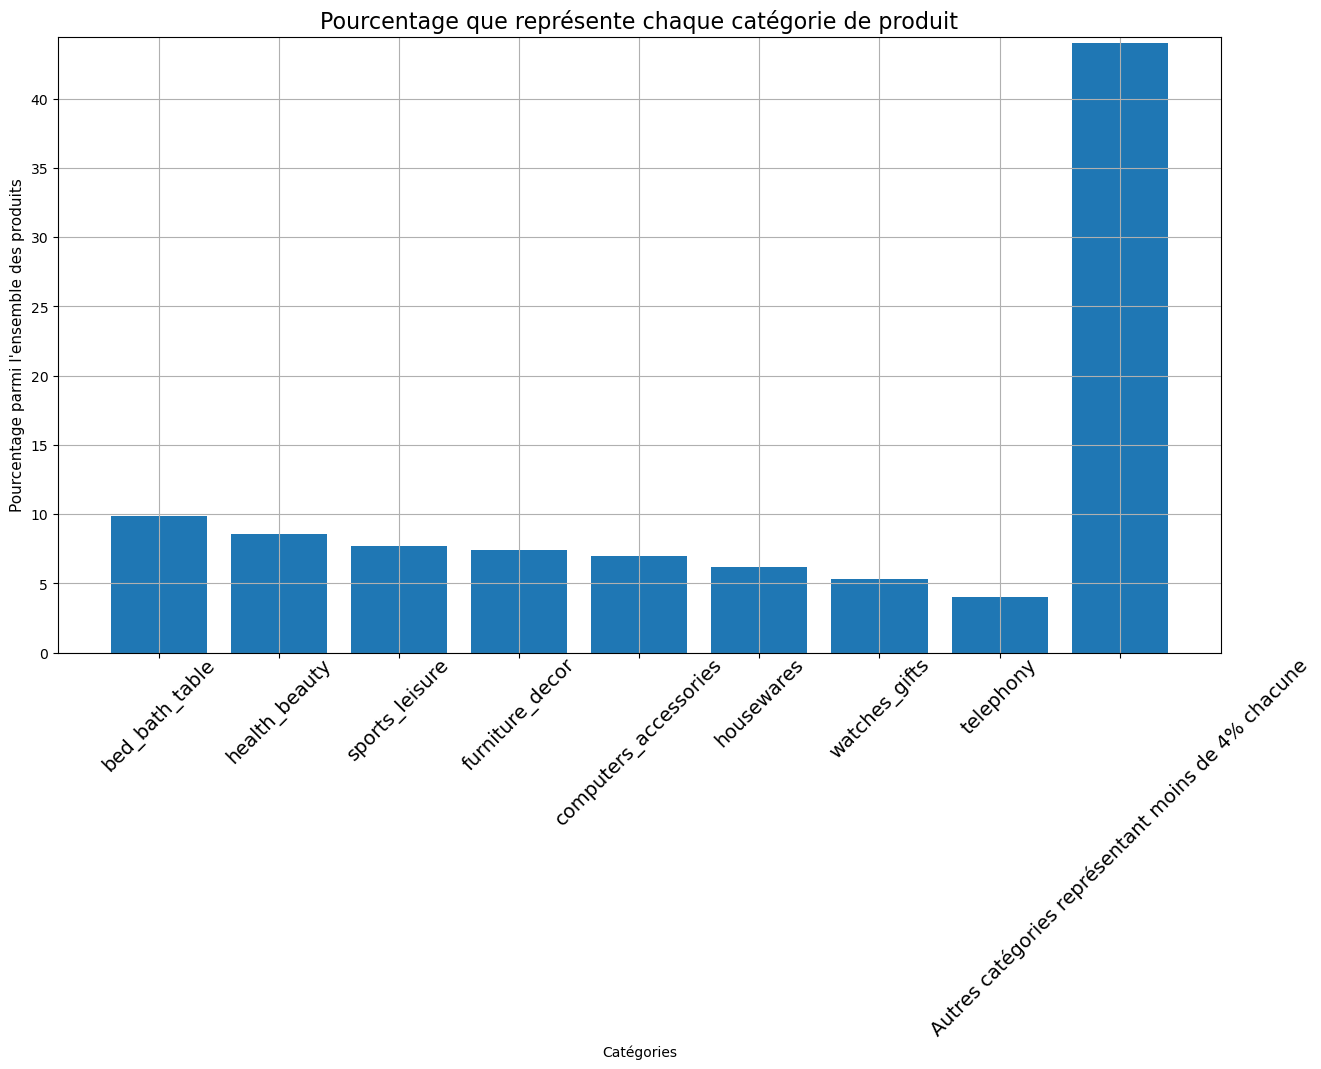

In [102]:
#Diagramme à barres de ces données :
plt.figure(figsize=(15,8))
axes = plt.gca()

axes.xaxis.set_ticks(range(analyse_categ.shape[0]))
plt.bar(height = analyse_categ["Pourcentage parmi l'ensemble des produits"], x=analyse_categ['Catégorie de produit'])

axes.set_xticklabels(labels = analyse_categ['Catégorie de produit'], rotation = 45, size = 14, verticalalignment = 'center_baseline')

axes.set_xlabel('Catégories')
axes.set_ylabel("Pourcentage parmi l'ensemble des produits", fontsize = 11)
axes.set_title("Pourcentage que représente chaque catégorie de produit", fontsize = 16)
axes.set_ylim(0,analyse_categ["Pourcentage parmi l'ensemble des produits"].max()+0.5)

plt.grid()
plt.show()

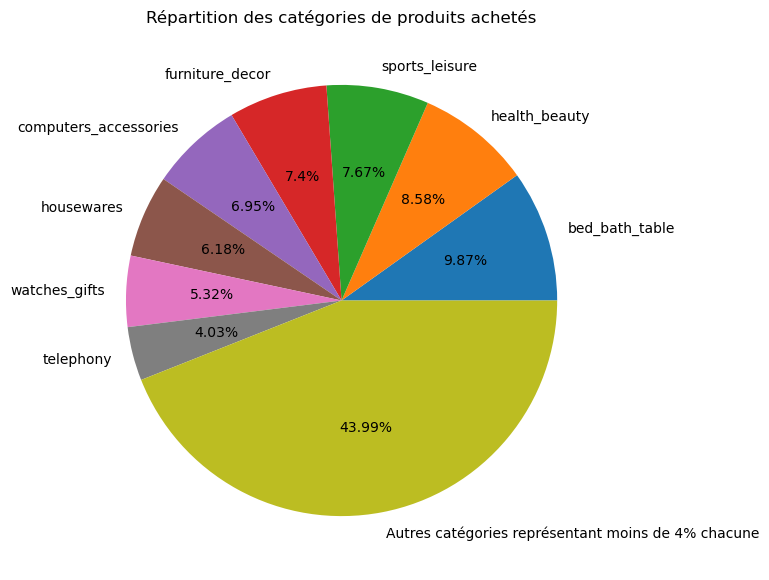

In [103]:
#Diagramme circulaire de ces données :
fig, ax = plt.subplots(figsize=(12, 7))
x = analyse_categ["Pourcentage parmi l'ensemble des produits"]
plt.pie(x, labels = analyse_categ['Catégorie de produit'], autopct = lambda x: str(round(x, 2)) + '%')


#plt.pie(x, labels = analyse_categ['Catégorie de produit'], normalize = True, autopct = lambda x: str(round(x, 2)) + '%')
ax.set_title("Répartition des catégories de produits achetés")
plt.show()

# 5. Regroupement des variables pertinentes dans un seul dataset

In [104]:
#Regroupement des paiements pour avoir le prix de la commande en entier :
df_order_payments_agreg = df_order_payments.groupby(by='order_id',
                        as_index=False)['payment_value'].sum()
df_order_payments_agreg.columns = ['order_id', 'payment_value_agreg']

df_order_payments_agreg



,order_id,payment_value_agreg
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


In [105]:
#Vérification : Exemple de commande :
df_order_payments[df_order_payments['order_id'] == '31bc09fdbd701a7a4f9b55b5955b8687']



,order_id,payment_sequential,payment_type,payment_installments,payment_value
27995,31bc09fdbd701a7a4f9b55b5955b8687,3,voucher,1,37.88
39416,31bc09fdbd701a7a4f9b55b5955b8687,7,voucher,1,3.48
43160,31bc09fdbd701a7a4f9b55b5955b8687,4,voucher,1,40.33
45492,31bc09fdbd701a7a4f9b55b5955b8687,1,voucher,1,26.86
74317,31bc09fdbd701a7a4f9b55b5955b8687,5,voucher,1,22.28
82459,31bc09fdbd701a7a4f9b55b5955b8687,2,voucher,1,55.71
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99


In [106]:
#Total payé :
df_order_payments.loc[df_order_payments['order_id'] == '31bc09fdbd701a7a4f9b55b5955b8687', 'payment_value'].sum()

264.53

In [107]:
df_order_payments_agreg[df_order_payments_agreg['order_id'] == '31bc09fdbd701a7a4f9b55b5955b8687']
#Ici on a bien le total payé

,order_id,payment_value_agreg
19242,31bc09fdbd701a7a4f9b55b5955b8687,264.53


In [108]:
df_customers.shape

(99440, 5)

In [109]:
df_orders.shape

(99440, 8)

In [110]:
df_order_payments_agreg.shape

(99440, 2)

In [111]:
df_order_payments.shape

(103886, 5)

In [112]:
df = df_customers[['customer_unique_id', 'customer_id']]
df = pd.merge(df, df_orders[['customer_id', 'order_purchase_timestamp', 'order_id']], on='customer_id')
df = pd.merge(df, df_order_payments_agreg[['order_id',  'payment_value_agreg']], on='order_id', how='left')
df = pd.merge(df, df_order_reviews[['order_id', 'review_score']], on='order_id', how='left' )
df

,customer_unique_id,customer_id,order_purchase_timestamp,order_id,payment_value_agreg,review_score
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,00e7ee1b050b8499577073aeb2a297a1,146.87,4.0
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:48:24,29150127e6685892b6eab3eec79f59c7,335.48,5.0
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-19 16:07:45,b2059ed67ce144a36e2aa97d2c9e9ad2,157.73,5.0
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 16:06:38,951670f92359f4fe4a63112aa7306eba,173.30,5.0
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 09:51:30,6b7d50bd145f6fc7f33cebabd7e49d0f,252.25,5.0
...,...,...,...,...,...,...
99435,1a29b476fee25c95fbafc67c5ac95cf8,17ddf5dd5d51696bb3d7c6291687be6f,2018-04-07 15:48:17,6760e20addcf0121e9d58f2f1ff14298,88.78,4.0
99436,d52a67c98be1cf6a5c84435bd38d095d,e7b71a9017aa05c9a7fd292d714858e8,2018-04-04 08:20:22,9ec0c8947d973db4f4e8dcf1fbfa8f1b,129.06,5.0
99437,e9f50caf99f032f0bf3c55141f019d99,5e28dfe12db7fb50a4b2f691faecea5e,2018-04-08 20:11:50,fed4434add09a6f332ea398efd656a5c,56.04,1.0
99438,73c2643a0a458b49f58cea58833b192e,56b18e2166679b8a959d72dd06da27f9,2017-11-03 21:08:33,e31ec91cea1ecf97797787471f98a8c2,711.07,5.0


In [113]:
df['order_id'].nunique()

99440

In [114]:
df[df['order_id'] == '4637ca194b6387e2d538dc89b124b0ee']

,customer_unique_id,customer_id,order_purchase_timestamp,order_id,payment_value_agreg,review_score
3742,968fac81e2c44fb6c1e3ac2a45e6a102,a73c1f73f5772cf801434bf984b0b1a7,2018-09-03 14:14:25,4637ca194b6387e2d538dc89b124b0ee,0.0,3.0


In [115]:
df_order_payments[df_order_payments['order_id'] == '4637ca194b6387e2d538dc89b124b0ee']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0


In [116]:
df.isna().sum()

customer_unique_id            0
customer_id                   0
order_purchase_timestamp      0
order_id                      0
payment_value_agreg           0
review_score                768
dtype: int64

## Traitement des valeurs manquantes dans review_score avec le dataframe des catégories de produit :

In [117]:

df_analyse_categ.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
product_category_name            0
product_category_name_english    0
dtype: int64

In [118]:
#Remplacement de la catégorie "Inconnue" par nan car il y a des valeurs inconnues dans review_score de df
df_analyse_categ.loc[df_analyse_categ['product_category_name_english'] == 'Inconnue', 'product_category_name_english'] = np.nan

In [119]:
df_analyse_categ.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
product_category_name               0
product_category_name_english    1603
dtype: int64

In [120]:
#Réduction du DF
df_review_categ = df_analyse_categ[['order_id', 'order_item_id', 'product_id', 'product_category_name_english']]
df_review_categ

,order_id,order_item_id,product_id,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
...,...,...,...,...
112642,b99217b1fcf2fdeace7b8d869b76cb91,1,57bdf3098169cccdb62221bd3e089cbd,fashion_childrens_clothes
112643,bc3ac768a8963f4ca68942ea6558fc9f,1,57bdf3098169cccdb62221bd3e089cbd,fashion_childrens_clothes
112644,cab08f0417a702d0f4782ec02356a4ac,1,8cfc3506cedc0626364457d254429118,fashion_childrens_clothes
112645,cb53f0b6e8f9082a9f5a113765dd1236,1,8cfc3506cedc0626364457d254429118,fashion_childrens_clothes


In [121]:
#Liste des commandes avec plus de 1 article
list_commande = df_review_categ.loc[df_review_categ['order_item_id'] != 1, 'order_id']
list_commande

7         c9ef97d2854afe64a3b4488bc2836af6
14        45c780334bc32cb77559a65c5f171160
25        dc12f9e8414131e62897902a78e0286e
115       7dcb3c2cc15f5bcb73f79ee65a917b0f
265       8c2b13adf3f377c8f2b06b04321b0925
                        ...               
112608    8c0921d37402722b282083329db79f9b
112615    28915ae2a90c218f0c2b7f8e0fb280e0
112618    3821dc9ac1b25bed42324d0885b0a930
112629    1d7542bb5262913fe0516f7943b69a58
112635    d7ae3c10c3a4c7a721e64ba401ee745b
Name: order_id, Length: 13982, dtype: object

In [122]:
#Commandes avec un seul article
categ_commande = df_review_categ[~df_review_categ['order_id'].isin(list_commande)]
categ_commande

,order_id,order_item_id,product_id,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
...,...,...,...,...
112640,3da4b0f0c89bb8fee8a810459e641414,1,28ac6af4008a402e5039f3e042a36e13,fashion_childrens_clothes
112641,9fa3a005f89a187501fa1bd63d6125fb,1,57bdf3098169cccdb62221bd3e089cbd,fashion_childrens_clothes
112644,cab08f0417a702d0f4782ec02356a4ac,1,8cfc3506cedc0626364457d254429118,fashion_childrens_clothes
112645,cb53f0b6e8f9082a9f5a113765dd1236,1,8cfc3506cedc0626364457d254429118,fashion_childrens_clothes


In [123]:
df

,customer_unique_id,customer_id,order_purchase_timestamp,order_id,payment_value_agreg,review_score
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,00e7ee1b050b8499577073aeb2a297a1,146.87,4.0
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:48:24,29150127e6685892b6eab3eec79f59c7,335.48,5.0
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-19 16:07:45,b2059ed67ce144a36e2aa97d2c9e9ad2,157.73,5.0
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 16:06:38,951670f92359f4fe4a63112aa7306eba,173.30,5.0
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 09:51:30,6b7d50bd145f6fc7f33cebabd7e49d0f,252.25,5.0
...,...,...,...,...,...,...
99435,1a29b476fee25c95fbafc67c5ac95cf8,17ddf5dd5d51696bb3d7c6291687be6f,2018-04-07 15:48:17,6760e20addcf0121e9d58f2f1ff14298,88.78,4.0
99436,d52a67c98be1cf6a5c84435bd38d095d,e7b71a9017aa05c9a7fd292d714858e8,2018-04-04 08:20:22,9ec0c8947d973db4f4e8dcf1fbfa8f1b,129.06,5.0
99437,e9f50caf99f032f0bf3c55141f019d99,5e28dfe12db7fb50a4b2f691faecea5e,2018-04-08 20:11:50,fed4434add09a6f332ea398efd656a5c,56.04,1.0
99438,73c2643a0a458b49f58cea58833b192e,56b18e2166679b8a959d72dd06da27f9,2017-11-03 21:08:33,e31ec91cea1ecf97797787471f98a8c2,711.07,5.0


In [124]:
#Association des commandes avec un seul produit et la catégorie :
df = pd.merge(df, categ_commande[['order_id', 'product_category_name_english']], on='order_id', how='left' )
df


,customer_unique_id,customer_id,order_purchase_timestamp,order_id,payment_value_agreg,review_score,product_category_name_english
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,00e7ee1b050b8499577073aeb2a297a1,146.87,4.0,office_furniture
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:48:24,29150127e6685892b6eab3eec79f59c7,335.48,5.0,housewares
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-19 16:07:45,b2059ed67ce144a36e2aa97d2c9e9ad2,157.73,5.0,office_furniture
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 16:06:38,951670f92359f4fe4a63112aa7306eba,173.30,5.0,office_furniture
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 09:51:30,6b7d50bd145f6fc7f33cebabd7e49d0f,252.25,5.0,home_confort
...,...,...,...,...,...,...,...
99435,1a29b476fee25c95fbafc67c5ac95cf8,17ddf5dd5d51696bb3d7c6291687be6f,2018-04-07 15:48:17,6760e20addcf0121e9d58f2f1ff14298,88.78,4.0,books_general_interest
99436,d52a67c98be1cf6a5c84435bd38d095d,e7b71a9017aa05c9a7fd292d714858e8,2018-04-04 08:20:22,9ec0c8947d973db4f4e8dcf1fbfa8f1b,129.06,5.0,sports_leisure
99437,e9f50caf99f032f0bf3c55141f019d99,5e28dfe12db7fb50a4b2f691faecea5e,2018-04-08 20:11:50,fed4434add09a6f332ea398efd656a5c,56.04,1.0,health_beauty
99438,73c2643a0a458b49f58cea58833b192e,56b18e2166679b8a959d72dd06da27f9,2017-11-03 21:08:33,e31ec91cea1ecf97797787471f98a8c2,711.07,5.0,watches_gifts


In [125]:
df.isna().sum()

customer_unique_id                   0
customer_id                          0
order_purchase_timestamp             0
order_id                             0
payment_value_agreg                  0
review_score                       768
product_category_name_english    11864
dtype: int64

In [126]:
#Produits n'ayant ni review_score, ni catégorie :
df[(df['review_score'].isnull() == True) & (df['product_category_name_english'].isnull() == True)]

,customer_unique_id,customer_id,order_purchase_timestamp,order_id,payment_value_agreg,review_score,product_category_name_english
785,47bd939e378c0ae8734c7c4194f52cfd,e4c8227df878d2e203bc81fc1351342f,2017-07-20 19:26:06,03a3628434dd670dd5b9896337451c86,393.84,NaN,NaN
843,e6925d3e39cebd0f699008b248e58361,5c78528de7bc16285f19af96fce88f02,2018-08-11 21:38:00,93881917b8e0f2bf11eec7abbbfe43ec,674.70,NaN,NaN
1373,5400394e71d0e31eff5a35aa40fb26ac,70c5b1b9829515c9575141eca21003b1,2018-02-26 21:40:14,6679781bbd182ebad33a3393741e6334,90.24,NaN,NaN
1463,a40096fc0a3862e9e12bc55b5f8e6ab2,9f6f3da49e2d46e3a7529f5e3c25ecce,2017-10-10 18:31:36,aec47b9987c836ffee2d7664b0929ec1,91.70,NaN,NaN
3603,c9e88dde299927079d22c21f72ba6e3d,35a68e6e1ebd3fa29294c6a7b198db42,2018-02-12 23:27:44,cb47bdb6944b3df9373054e6ab62cf46,931.62,NaN,NaN
...,...,...,...,...,...,...,...
95243,3ebd2e5f948dbd9d5165184b5ca781b2,4833bffdf808dd229fb636eacf117d88,2018-08-01 08:33:57,2da01b4da104add683f87af323a0e9d1,139.80,NaN,NaN
95451,725e7189b1c60964a244d43ef0b83d29,0125ed303758dc1d7e4d99b000f88768,2017-11-17 19:55:15,a02c544d48cac6a9a9a21d5a33b8911c,322.94,NaN,NaN
95461,d9456ef6d4231fb2637e490212b3e32f,8e9e28f565a0e470a97fd879909388fe,2017-08-30 18:48:01,596288a27579ad1fec1d704efe7d9ab7,327.60,NaN,NaN
96467,367f4686d7112d69feed92b02a1775ed,0419432b440cac406896f9b2ed4419a1,2017-05-19 18:13:52,d731191f76c39fe5c7d22edddb6836ba,164.40,NaN,NaN


In [127]:
#Liste des catégories :
list_categorie = list(df['product_category_name_english'].unique())
list_categorie

['office_furniture',
 'housewares',
 'home_confort',
 'sports_leisure',
 'computers_accessories',
 nan,
 'toys',
 'furniture_decor',
 'auto',
 'air_conditioning',
 'telephony',
 'health_beauty',
 'garden_tools',
 'pet_shop',
 'bed_bath_table',
 'baby',
 'watches_gifts',
 'kitchen_dining_laundry_garden_furniture',
 'perfumery',
 'art',
 'stationery',
 'fashio_female_clothing',
 'consoles_games',
 'construction_tools_lights',
 'food_drink',
 'cool_stuff',
 'fashion_bags_accessories',
 'home_construction',
 'luggage_accessories',
 'electronics',
 'home_appliances_2',
 'fashion_male_clothing',
 'small_appliances',
 'small_appliances_home_oven_and_coffee',
 'books_general_interest',
 'home_appliances',
 'costruction_tools_tools',
 'signaling_and_security',
 'musical_instruments',
 'construction_tools_construction',
 'music',
 'fashion_shoes',
 'industry_commerce_and_business',
 'fashion_underwear_beach',
 'dvds_blu_ray',
 'construction_tools_safety',
 'food',
 'fixed_telephony',
 'furniture

In [128]:
#Imputation de valeurs manquantes dans les avis avec la moyenne des avis par catégorie :
for categorie in list_categorie :
    mask = df['product_category_name_english'] == categorie
    moyenne = df.loc[mask, 'review_score'].mean()
    moyenne = round(moyenne,0)
    df.loc[mask, 'review_score'] = df.loc[mask, 'review_score'].fillna(moyenne)
df.isna().sum()
#Encore 140 valeurs manquantes qui comportent plus d'un article

customer_unique_id                   0
customer_id                          0
order_purchase_timestamp             0
order_id                             0
payment_value_agreg                  0
review_score                       140
product_category_name_english    11864
dtype: int64

In [129]:
#Imputation de l'avis moyen de toutes les commandes sur les valeurs manquantes restantes :
moyenne_all_reviews = df['review_score'].mean()
moyenne_all_reviews = round(moyenne_all_reviews,0)
df['review_score'] = df['review_score'].fillna(moyenne_all_reviews)
df.isna().sum()

customer_unique_id                   0
customer_id                          0
order_purchase_timestamp             0
order_id                             0
payment_value_agreg                  0
review_score                         0
product_category_name_english    11864
dtype: int64

In [130]:
df['review_score'].nunique()
#Plus d'avis manquant, et toujours 5 niveaux d'avis

5

In [131]:
df['review_score'].unique()

array([4., 5., 3., 1., 2.])

In [132]:
df = df.drop('product_category_name_english', axis = 1)
df.isna().sum()

customer_unique_id          0
customer_id                 0
order_purchase_timestamp    0
order_id                    0
payment_value_agreg         0
review_score                0
dtype: int64

# 6. Outliers

## 6.1 Montants par commande

In [133]:
df_order_payments_agreg

,order_id,payment_value_agreg
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


In [134]:
df_order_payments_agreg[df_order_payments_agreg['payment_value_agreg'] == 0]
#3 commandes sont à 0 euros

,order_id,payment_value_agreg
251,00b1cb0320190ca0daa2c88b35206009,0.0
27282,4637ca194b6387e2d538dc89b124b0ee,0.0
78007,c8c528189310eaa44a745b8d9d26908b,0.0


In [135]:
df_order_items[df_order_items['order_id'] == '00b1cb0320190ca0daa2c88b35206009']
#La 1ère commande n'est pas dans order_item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [136]:
df_order_items[df_order_items['order_id'] == '4637ca194b6387e2d538dc89b124b0ee']
#La 2ème commande n'est pas dans order_item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [137]:
df_order_items[df_order_items['order_id'] == 'c8c528189310eaa44a745b8d9d26908b']
#La 3ème commande n'est pas dans order_item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [138]:
df_order_payments_agreg.describe()

,payment_value_agreg
count,99440.000000
mean,160.990267
std,221.951257
min,0.000000
25%,62.010000
50%,105.290000
75%,176.970000
max,13664.080000


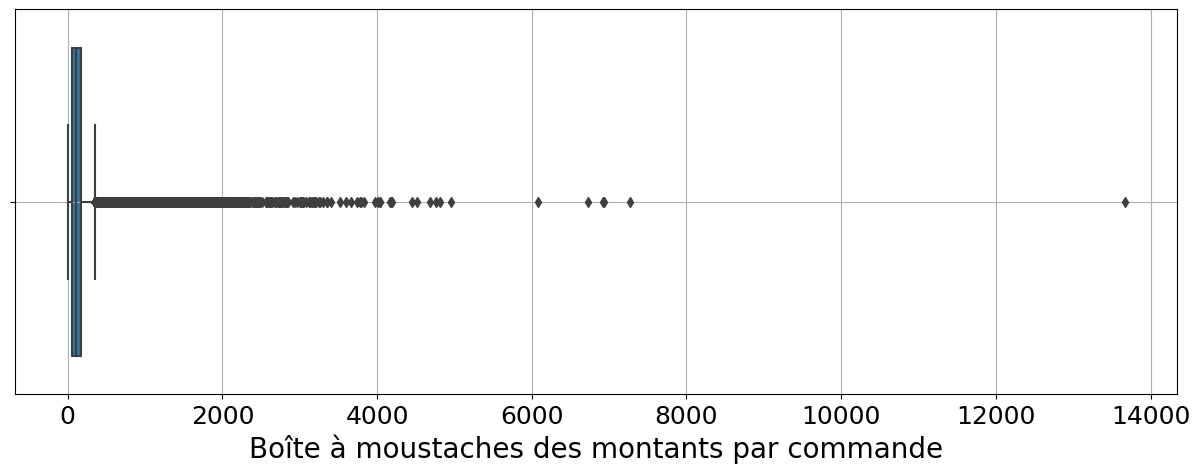

In [139]:
#Boîte à moustaches
def boxplot_outliers(data, nom_variable, titre):
    plt.figure(figsize=(15,5))
    sns.boxplot(data = data, x = nom_variable, orient = "h")
    plt.xlabel(titre, fontsize = 20)
    plt.tick_params(labelsize = 18)
    plt.grid()
    plt.show()
 
boxplot_outliers (df_order_payments_agreg, "payment_value_agreg", "Boîte à moustaches des montants par commande" )

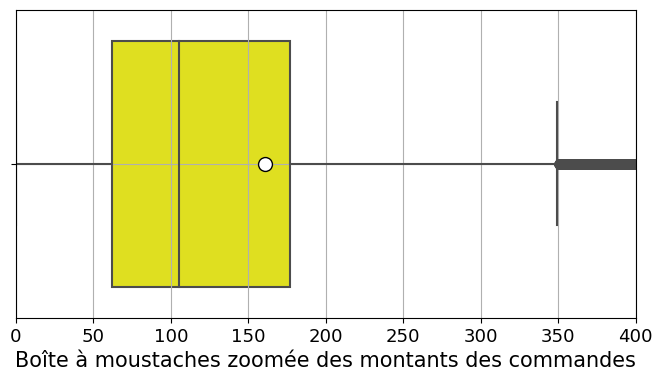

In [140]:
#Boîte à moustaches
def boxplot_outliers2(data, nom_variable, titre):
    plt.figure(figsize=(8,4))
    sns.boxplot(data = data, x = nom_variable, orient = "h",
                color = 'yellow',
               showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
    plt.xlabel(titre, fontsize = 15)
    plt.tick_params(labelsize = 13)
    plt.xlim(0,400)
    plt.grid()
    plt.show()
 
boxplot_outliers2 (df_order_payments_agreg, "payment_value_agreg", "Boîte à moustaches zoomée des montants des commandes" )

In [141]:
#Liste des outliers
def list_ouliers(df, nom_colonne_df, nom_dataframe, nom_variable) :
    q1=df[nom_colonne_df].quantile(0.25)
    q3=df[nom_colonne_df].quantile(0.75)

    IQR=q3-q1

    outliers = pd.DataFrame()
    outliers = df[(df[nom_colonne_df]<(q1-1.5*IQR)) | (df[nom_colonne_df]>(q3+1.5*IQR))]

    print(q1-1.5*IQR)
    print(q3+1.5*IQR)

    print("Liste des outliers de la variable ", nom_variable, "du dataframe ",nom_dataframe," :")
    return outliers

list_ouliers(df_order_payments_agreg, "payment_value_agreg", "Commandes", "Montant total")


-110.43
349.40999999999997
Liste des outliers de la variable  Montant total du dataframe  Commandes  :


,order_id,payment_value_agreg
7,000576fe39319847cbb9d288c5617fa6,880.75
15,0009c9a17f916a706d71784483a5d643,650.34
30,00137e170939bba5a3134e2386413108,421.65
37,0017afd5076e074a48f1f1a4c7bac9c5,853.39
56,0025c5d1a8ca53a240ec2634bb4492ea,419.39
...,...,...
99380,ffdab5e1596138d37793566aa1424d0c,418.35
99426,fff7c4452f050315db1b3f24d9df5fcd,756.91
99428,fff8287bbae429a99bb7e8c21d151c41,456.28
99433,fffb9224b6fc7c43ebb0904318b10b5f,356.76


## 6.2 Montants par catégorie pour les 3 principales catégories

## 6.2.1. Catégorie : bed_bath_table

In [142]:
df_analyse_categ

,order_id,order_item_id,product_id,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
...,...,...,...,...,...
112642,b99217b1fcf2fdeace7b8d869b76cb91,1,57bdf3098169cccdb62221bd3e089cbd,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
112643,bc3ac768a8963f4ca68942ea6558fc9f,1,57bdf3098169cccdb62221bd3e089cbd,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
112644,cab08f0417a702d0f4782ec02356a4ac,1,8cfc3506cedc0626364457d254429118,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
112645,cb53f0b6e8f9082a9f5a113765dd1236,1,8cfc3506cedc0626364457d254429118,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [143]:
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [144]:
df_montant_categ = pd.merge(df_analyse_categ[['order_id', 'order_item_id', 'product_id', 'product_category_name_english']], df_order_items[['order_id', 'order_item_id', 'product_id', 'price', 'freight_value']], on=['order_id', 'order_item_id', 'product_id'])
df_montant_categ


,order_id,order_item_id,product_id,product_category_name_english,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.90,13.29
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,55.90,17.96
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,64.90,18.33
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.90,16.17
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.90,13.29
...,...,...,...,...,...,...
112642,b99217b1fcf2fdeace7b8d869b76cb91,1,57bdf3098169cccdb62221bd3e089cbd,fashion_childrens_clothes,39.99,10.15
112643,bc3ac768a8963f4ca68942ea6558fc9f,1,57bdf3098169cccdb62221bd3e089cbd,fashion_childrens_clothes,39.99,6.43
112644,cab08f0417a702d0f4782ec02356a4ac,1,8cfc3506cedc0626364457d254429118,fashion_childrens_clothes,89.99,17.07
112645,cb53f0b6e8f9082a9f5a113765dd1236,1,8cfc3506cedc0626364457d254429118,fashion_childrens_clothes,89.99,7.49


In [145]:
df_montant_categ['montant_par_produit'] = df_montant_categ[['price', 'freight_value']].sum(axis=1)
df_montant_categ = df_montant_categ.drop(['price', 'freight_value'], axis = 1)

In [146]:
df_montant_categ

,order_id,order_item_id,product_id,product_category_name_english,montant_par_produit
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,72.19
...,...,...,...,...,...
112642,b99217b1fcf2fdeace7b8d869b76cb91,1,57bdf3098169cccdb62221bd3e089cbd,fashion_childrens_clothes,50.14
112643,bc3ac768a8963f4ca68942ea6558fc9f,1,57bdf3098169cccdb62221bd3e089cbd,fashion_childrens_clothes,46.42
112644,cab08f0417a702d0f4782ec02356a4ac,1,8cfc3506cedc0626364457d254429118,fashion_childrens_clothes,107.06
112645,cb53f0b6e8f9082a9f5a113765dd1236,1,8cfc3506cedc0626364457d254429118,fashion_childrens_clothes,97.48


In [147]:
#Sélection de la catégorie 'bed_bath_table' :
montant_par_produit_bbt = df_montant_categ[df_montant_categ['product_category_name_english'] == 'bed_bath_table']
montant_par_produit_bbt

,order_id,order_item_id,product_id,product_category_name_english,montant_par_produit
45317,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,bed_bath_table,97.32
45318,00c763284c0056eed753352f5559ff0a,1,99a4788cb24856965c36a24e339b6058,bed_bath_table,94.55
45319,01be661b8196707ef60f062632d6d1bd,1,99a4788cb24856965c36a24e339b6058,bed_bath_table,102.03
45320,01be661b8196707ef60f062632d6d1bd,2,99a4788cb24856965c36a24e339b6058,bed_bath_table,102.03
45321,028e1ce5e085cc7810f340572c316b35,1,99a4788cb24856965c36a24e339b6058,bed_bath_table,105.28
...,...,...,...,...,...
56427,ff9424310808d51de01b5e582c829336,1,56324522787b0f1b85cc081fffadc3f8,bed_bath_table,191.67
56428,ffbcbeeac5c9c9495cd729f896bc1d5f,1,bf348f19164cdedd0ae1cf7b1d72fede,bed_bath_table,97.69
56429,ffcbf9b4459704e9185c5c630d11b69c,1,9ae3dacfd2327107a1e28274fac25a4e,bed_bath_table,137.14
56430,ffe48cb3d8485e0cb0405e21192e592f,1,dd44ecaddb22d00c140856b180f5d9b4,bed_bath_table,147.04


In [148]:
montant_par_produit_bbt['montant_par_produit'].describe()

count    11115.000000
mean       111.712256
std         87.615626
min         15.890000
25%         62.815000
50%         94.670000
75%        135.160000
max       2225.690000
Name: montant_par_produit, dtype: float64

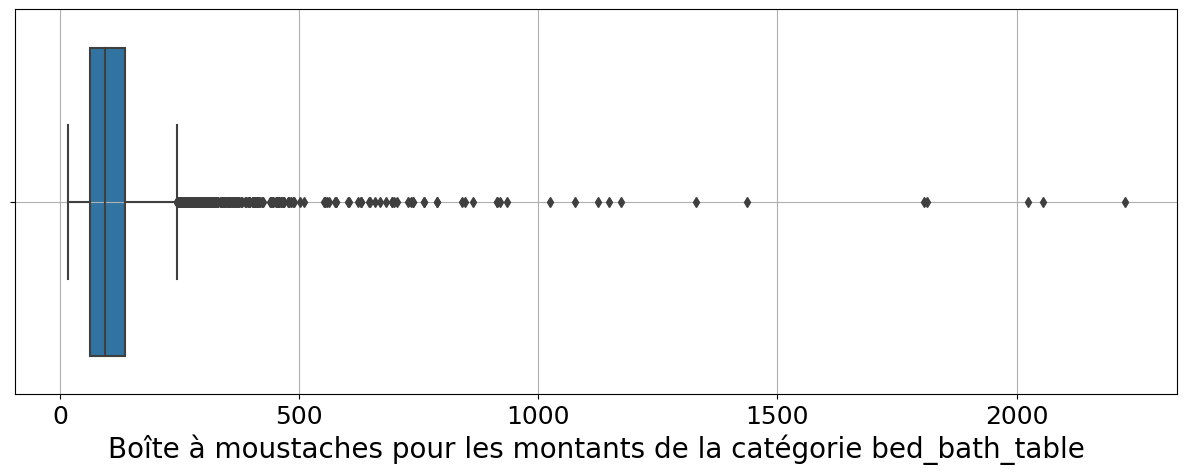

In [149]:
boxplot_outliers(montant_par_produit_bbt, 'montant_par_produit', "Boîte à moustaches pour les montants de la catégorie bed_bath_table")

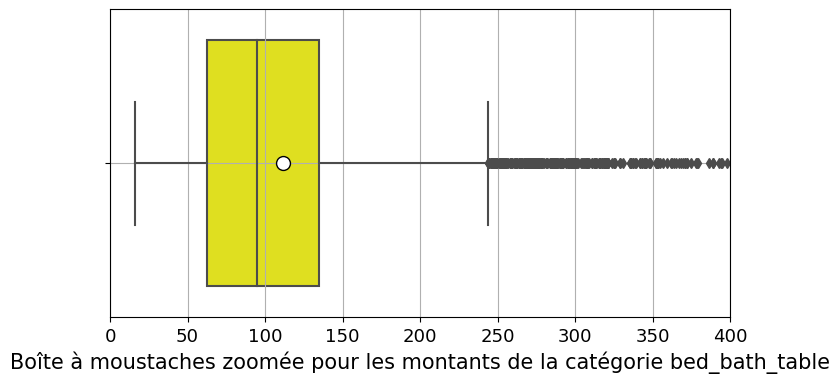

In [150]:
boxplot_outliers2(montant_par_produit_bbt, 'montant_par_produit', "Boîte à moustaches zoomée pour les montants de la catégorie bed_bath_table")

## 6.2.2. Catégorie : health_beauty

In [151]:
#Sélection de la catégorie 'health_beauty' :
montant_par_produit_hb = df_montant_categ[df_montant_categ['product_category_name_english'] == 'health_beauty']
montant_par_produit_hb

,order_id,order_item_id,product_id,product_category_name_english,montant_par_produit
33352,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,health_beauty,157.60
33353,6c5222e0550b757a63908aa2f0cacf95,1,310ae3c140ff94b03219ad0adc3c778f,health_beauty,163.22
33354,00061f2a7bc09da83e415a52dc8a4af1,1,d63c1011f49d98b976c352955b1c4bea,health_beauty,68.87
33355,0210336762a2618a562576d1266efefe,1,d63c1011f49d98b976c352955b1c4bea,health_beauty,76.38
33356,0224d4ce99f4262f9554d248dfad743c,1,d63c1011f49d98b976c352955b1c4bea,health_beauty,68.87
...,...,...,...,...,...
43014,fefc60b6174117cb96cd5eeaec4188b5,1,b6c0dab3208ff1a4b29721889b878b81,health_beauty,202.15
43015,ff0ce73492169dc291eea70f4ce38382,1,5e7baae596125f355d38d3823b041f1d,health_beauty,110.30
43016,ff1b05d81637f0904e3dd85ca4e50180,1,709839bfd3ba2c923015e0a5de970a7d,health_beauty,99.90
43017,ff6ae1548ceeb3aabebe8025b622bb3e,1,7b73a648fbaac51347a498d0a0b93740,health_beauty,64.36


In [152]:
montant_par_produit_hb['montant_par_produit'].describe()

count    9667.000000
mean      149.074647
std       187.615017
min         9.090000
25%        56.100000
50%        96.220000
75%       155.450000
max      3297.400000
Name: montant_par_produit, dtype: float64

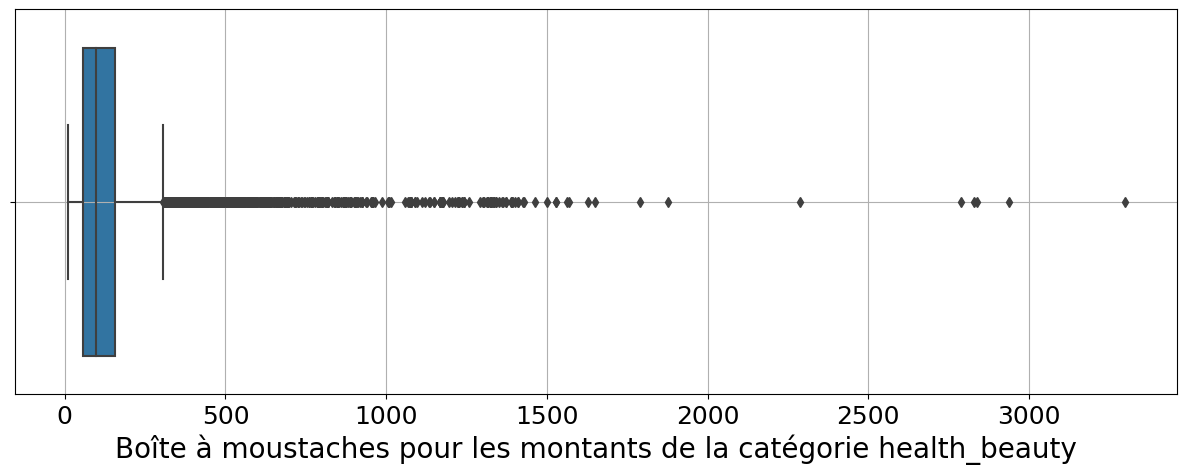

In [153]:
boxplot_outliers(montant_par_produit_hb, 'montant_par_produit', "Boîte à moustaches pour les montants de la catégorie health_beauty")

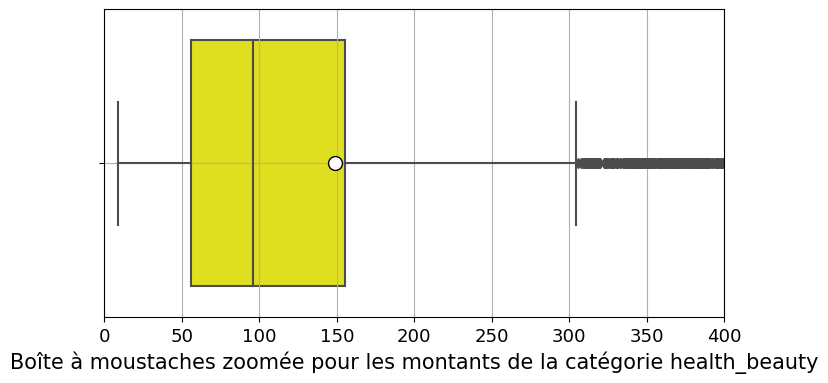

In [154]:
boxplot_outliers2(montant_par_produit_hb, 'montant_par_produit', "Boîte à moustaches zoomée pour les montants de la catégorie health_beauty")

## 6.2.3. Catégorie : sports_leisure

In [155]:
#Sélection de la catégorie 'sports_leisure' :
montant_par_produit_sl = df_montant_categ[df_montant_categ['product_category_name_english'] == 'sports_leisure']
montant_par_produit_sl

,order_id,order_item_id,product_id,product_category_name_english,montant_par_produit
56432,0009792311464db532ff765bf7b182ae,1,8cab8abac59158715e0d70a36c807415,sports_leisure,127.55
56433,28116a9f673362aaa7a4349192ad5e61,1,8cab8abac59158715e0d70a36c807415,sports_leisure,116.60
56434,000c3e6612759851cc3cbb4b83257986,1,b50c950aba0dcead2c48032a690ce817,sports_leisure,112.71
56435,0c00eb38b29dd352b15a6ee44f8a531a,1,b50c950aba0dcead2c48032a690ce817,sports_leisure,128.09
56436,25dae1a0efc5bba5a14622eaf552ad78,1,b50c950aba0dcead2c48032a690ce817,sports_leisure,128.09
...,...,...,...,...,...
65068,fee67a1d884fddbd3cd1da188db227e7,1,32c93bc61f5d2d836c65254f99a46b71,sports_leisure,63.50
65069,ff29c7cdeea12d00d7b40d4879cce688,1,6a96ef77fb9fd6a8de17df8d3b5a3087,sports_leisure,309.05
65070,ff4d755050a3a40c7cd03cbe7d11309c,1,6f735de7025b8e74fc832dfd6ec2bf5d,sports_leisure,257.95
65071,ff6ca87fd2b8db43cc48510cb32dfc69,1,91aa6246d855a7321d3899fd76ec63cd,sports_leisure,115.35


In [156]:
montant_par_produit_sl['montant_par_produit'].describe()

count    8641.000000
mean      133.856785
std       170.653999
min        11.820000
25%        58.620000
50%        96.470000
75%       153.170000
max      4163.510000
Name: montant_par_produit, dtype: float64

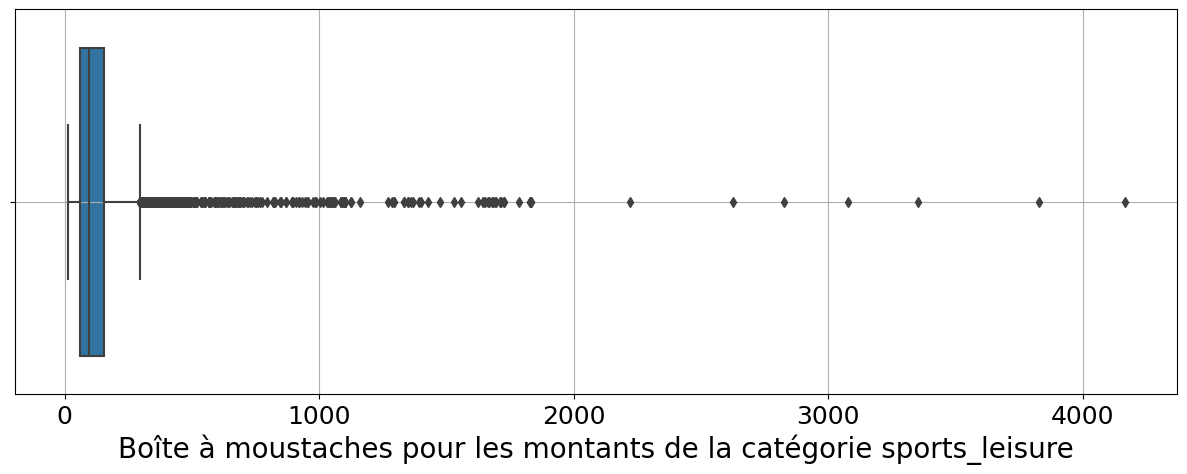

In [157]:
boxplot_outliers(montant_par_produit_sl, 'montant_par_produit', "Boîte à moustaches pour les montants de la catégorie sports_leisure")

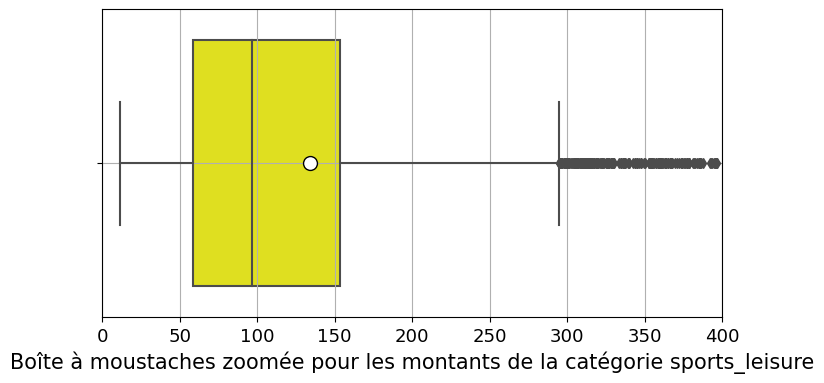

In [158]:
boxplot_outliers2(montant_par_produit_sl, 'montant_par_produit', "Boîte à moustaches zoomée pour les montants de la catégorie sports_leisure")

# 7. Panier moyen

## 7.1. Panier moyen général

In [159]:
#Dataframe des montants par commande :
df_order_payments_agreg

,order_id,payment_value_agreg
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


In [160]:
df_order_payments_agreg.describe()

,payment_value_agreg
count,99440.000000
mean,160.990267
std,221.951257
min,0.000000
25%,62.010000
50%,105.290000
75%,176.970000
max,13664.080000


In [161]:
moy_gen = round(df_order_payments_agreg['payment_value_agreg'].mean(), 2)
moy_gen

160.99

# Le panier moyen sur l'ensemble des commandes est d'environ 160,99 euros

## 7.2 Panier moyen pour la catégorie bed_bath_table

In [162]:
#Dataframe des montants pour la catégorie bed_bath_table :
montant_par_produit_bbt

,order_id,order_item_id,product_id,product_category_name_english,montant_par_produit
45317,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,bed_bath_table,97.32
45318,00c763284c0056eed753352f5559ff0a,1,99a4788cb24856965c36a24e339b6058,bed_bath_table,94.55
45319,01be661b8196707ef60f062632d6d1bd,1,99a4788cb24856965c36a24e339b6058,bed_bath_table,102.03
45320,01be661b8196707ef60f062632d6d1bd,2,99a4788cb24856965c36a24e339b6058,bed_bath_table,102.03
45321,028e1ce5e085cc7810f340572c316b35,1,99a4788cb24856965c36a24e339b6058,bed_bath_table,105.28
...,...,...,...,...,...
56427,ff9424310808d51de01b5e582c829336,1,56324522787b0f1b85cc081fffadc3f8,bed_bath_table,191.67
56428,ffbcbeeac5c9c9495cd729f896bc1d5f,1,bf348f19164cdedd0ae1cf7b1d72fede,bed_bath_table,97.69
56429,ffcbf9b4459704e9185c5c630d11b69c,1,9ae3dacfd2327107a1e28274fac25a4e,bed_bath_table,137.14
56430,ffe48cb3d8485e0cb0405e21192e592f,1,dd44ecaddb22d00c140856b180f5d9b4,bed_bath_table,147.04


In [163]:
#Regroupement des montants pour cette catégorie par commande :
montant_par_produit_bbt_agreg = montant_par_produit_bbt.groupby(by='order_id',
                        as_index=False)['montant_par_produit'].sum()
montant_par_produit_bbt_agreg.columns = ['order_id', 'Somme payée pour la catégorie bed_bath_table par commande']

montant_par_produit_bbt_agreg

,order_id,Somme payée pour la catégorie bed_bath_table par commande
0,0006ec9db01a64e59a68b2c340bf65a7,97.32
1,000e63d38ae8c00bbcb5a30573b99628,56.78
2,00169e31ef4b29deaae414f9a5e95929,55.11
3,001c85b5f68d2be0cb0797afc9e8ce9a,112.71
4,001dbc16dc51075e987543d23a0507c7,87.90
...,...,...
9412,ffdc79897a2df4181a299b803765f0cc,62.01
9413,ffe48cb3d8485e0cb0405e21192e592f,147.04
9414,fff2e9e3aa8644e19710216b4ef53ab2,86.15
9415,fffb2ef8874127f75b52b643880fd7e0,39.96


In [164]:
montant_par_produit_bbt_agreg.describe()

,Somme payée pour la catégorie bed_bath_table par commande
count,9417.000000
mean,131.855338
std,111.779143
min,15.890000
25%,70.970000
50%,105.280000
75%,160.470000
max,2225.690000


In [165]:
moy_bbt = round(montant_par_produit_bbt_agreg['Somme payée pour la catégorie bed_bath_table par commande'].mean(), 2)
moy_bbt

131.86

# Le panier moyen sur l'ensemble des commandes pour la catégorie bed_bath_table est d'environ 131,86 euros

## 7.3 Panier moyen pour la catégorie health_beauty

In [166]:
#Dataframe des montants pour la catégorie health_beauty :
montant_par_produit_hb


,order_id,order_item_id,product_id,product_category_name_english,montant_par_produit
33352,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,health_beauty,157.60
33353,6c5222e0550b757a63908aa2f0cacf95,1,310ae3c140ff94b03219ad0adc3c778f,health_beauty,163.22
33354,00061f2a7bc09da83e415a52dc8a4af1,1,d63c1011f49d98b976c352955b1c4bea,health_beauty,68.87
33355,0210336762a2618a562576d1266efefe,1,d63c1011f49d98b976c352955b1c4bea,health_beauty,76.38
33356,0224d4ce99f4262f9554d248dfad743c,1,d63c1011f49d98b976c352955b1c4bea,health_beauty,68.87
...,...,...,...,...,...
43014,fefc60b6174117cb96cd5eeaec4188b5,1,b6c0dab3208ff1a4b29721889b878b81,health_beauty,202.15
43015,ff0ce73492169dc291eea70f4ce38382,1,5e7baae596125f355d38d3823b041f1d,health_beauty,110.30
43016,ff1b05d81637f0904e3dd85ca4e50180,1,709839bfd3ba2c923015e0a5de970a7d,health_beauty,99.90
43017,ff6ae1548ceeb3aabebe8025b622bb3e,1,7b73a648fbaac51347a498d0a0b93740,health_beauty,64.36


In [167]:
#Regroupement des montants pour cette catégorie par commande :
montant_par_produit_hb_agreg = montant_par_produit_hb.groupby(by='order_id',
                        as_index=False)['montant_par_produit'].sum()
montant_par_produit_hb_agreg.columns = ['order_id', 'Somme payée pour la catégorie health_beauty par commande']

montant_par_produit_hb_agreg

,order_id,Somme payée pour la catégorie health_beauty par commande
0,0005a1a1728c9d785b8e2b08b904576c,157.60
1,00061f2a7bc09da83e415a52dc8a4af1,68.87
2,001d8f0e34a38c37f7dba2a37d4eba8b,53.54
3,001e7cf2ad6bef3ade12ebc56ceaf0f3,51.10
4,0029c5db35ef291ce99d1262012e7daa,514.37
...,...,...
8830,ffce8a2dd7579795f5c1cbe2bf23d51d,126.78
8831,ffdd178654127ccf34a439e8704fecd9,108.61
8832,ffe146c862ce518ad378598499bf9204,102.49
8833,ffec1a6d35149778ec575d5048d44db8,55.04


In [168]:
montant_par_produit_hb_agreg.describe()

,Somme payée pour la catégorie health_beauty par commande
count,8835.000000
mean,163.113142
std,201.976919
min,9.590000
25%,64.090000
50%,103.590000
75%,174.430000
max,3297.400000


In [169]:
moy_hb = round(montant_par_produit_hb_agreg['Somme payée pour la catégorie health_beauty par commande'].mean(), 2)
moy_hb

163.11

# Le panier moyen sur l'ensemble des commandes pour la catégorie health_beauty est d'environ 163,11 euros

## 7.4 Panier moyen pour la catégorie sports_leisure

In [170]:
#Dataframe des montants pour la catégorie sports_leisure :
montant_par_produit_sl

,order_id,order_item_id,product_id,product_category_name_english,montant_par_produit
56432,0009792311464db532ff765bf7b182ae,1,8cab8abac59158715e0d70a36c807415,sports_leisure,127.55
56433,28116a9f673362aaa7a4349192ad5e61,1,8cab8abac59158715e0d70a36c807415,sports_leisure,116.60
56434,000c3e6612759851cc3cbb4b83257986,1,b50c950aba0dcead2c48032a690ce817,sports_leisure,112.71
56435,0c00eb38b29dd352b15a6ee44f8a531a,1,b50c950aba0dcead2c48032a690ce817,sports_leisure,128.09
56436,25dae1a0efc5bba5a14622eaf552ad78,1,b50c950aba0dcead2c48032a690ce817,sports_leisure,128.09
...,...,...,...,...,...
65068,fee67a1d884fddbd3cd1da188db227e7,1,32c93bc61f5d2d836c65254f99a46b71,sports_leisure,63.50
65069,ff29c7cdeea12d00d7b40d4879cce688,1,6a96ef77fb9fd6a8de17df8d3b5a3087,sports_leisure,309.05
65070,ff4d755050a3a40c7cd03cbe7d11309c,1,6f735de7025b8e74fc832dfd6ec2bf5d,sports_leisure,257.95
65071,ff6ca87fd2b8db43cc48510cb32dfc69,1,91aa6246d855a7321d3899fd76ec63cd,sports_leisure,115.35


In [171]:
#Regroupement des montants pour cette catégorie par commande :
montant_par_produit_sl_agreg = montant_par_produit_sl.groupby(by='order_id',
                        as_index=False)['montant_par_produit'].sum()
montant_par_produit_sl_agreg.columns = ['order_id', 'Somme payée pour la catégorie sports_leisure par commande']

montant_par_produit_sl_agreg

,order_id,Somme payée pour la catégorie sports_leisure par commande
0,0009792311464db532ff765bf7b182ae,127.55
1,000c3e6612759851cc3cbb4b83257986,112.71
2,00119ff934e539cf26f92b9ef0cdfed8,236.88
3,00143d0f86d6fbd9f9b38ab440ac16f5,109.29
4,00229e4e43f7a7e0b9dd819ad43268d3,91.39
...,...,...
7715,ffdee14e5cab83563d890d93e1d16f74,40.46
7716,ffea5b26be781da4c215c0feb484f4fd,140.07
7717,fff60e5408a9dd1e92ee30023052af30,148.70
7718,fffa82886406ccf10c7b4e35c4ff2788,273.92


In [172]:
montant_par_produit_sl_agreg.describe()

,Somme payée pour la catégorie sports_leisure par commande
count,7720.000000
mean,149.825969
std,186.361093
min,11.820000
25%,65.780000
50%,110.590000
75%,167.755000
max,4163.510000


In [173]:
moy_sl = round(montant_par_produit_sl_agreg['Somme payée pour la catégorie sports_leisure par commande'].mean(), 2)
moy_sl

149.83

# Le panier moyen sur l'ensemble des commandes pour la catégorie sports_leisure est d'environ 149,83 euros

## 7.5 Récapitulatif

In [174]:
panier_recap = pd.DataFrame()
panier_recap ['Panier moyen ...'] = ['général', 'pour la catégorie bed_bath_table', 'pour la catégorie health_beauty', 'pour la catégorie sports_leisure']
panier_recap['Montant moyen par commande en euros'] = [moy_gen, moy_bbt, moy_hb, moy_sl]
panier_recap

,Panier moyen ...,Montant moyen par commande en euros
0,général,160.99
1,pour la catégorie bed_bath_table,131.86
2,pour la catégorie health_beauty,163.11
3,pour la catégorie sports_leisure,149.83


# 8. Export .csv

In [175]:
df.head()

,customer_unique_id,customer_id,order_purchase_timestamp,order_id,payment_value_agreg,review_score
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,00e7ee1b050b8499577073aeb2a297a1,146.87,4.0
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:48:24,29150127e6685892b6eab3eec79f59c7,335.48,5.0
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-19 16:07:45,b2059ed67ce144a36e2aa97d2c9e9ad2,157.73,5.0
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 16:06:38,951670f92359f4fe4a63112aa7306eba,173.30,5.0
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 09:51:30,6b7d50bd145f6fc7f33cebabd7e49d0f,252.25,5.0


In [176]:
path = "data/cleaned/"
filename = "df_cleaned.csv"

In [177]:
df.to_csv(path + filename, index = False)
#index = False pour éviter la colonne Unamed : 0